# Objectives

- Using salary as the target variable
- Multiple Linear Regression
- Random Forest Regression


# Load the dataset

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv("lightcast_job_postings.csv")


# Show the first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72498 entries, 0 to 72497
Columns: 118 entries, id to naics_2022_6_name
dtypes: float64(38), object(80)
memory usage: 65.3+ MB


,id,last_updated_date,last_updated_timestamp,duplicates,posted,expired,duration,title_raw,body,modeled_expired,modeled_duration,company,company_name,company_raw,company_is_staffing,education_levels,education_levels_name,min_edu_levels,min_edu_levels_name,max_edu_levels,max_edu_levels_name,employment_type,employment_type_name,min_years_experience,max_years_experience,is_internship,salary,remote_type,remote_type_name,original_pay_period,salary_to,salary_from,location,city,city_name,county,county_name,msa,msa_name,state,state_name,county_outgoing,county_name_outgoing,county_incoming,county_name_incoming,msa_outgoing,msa_name_outgoing,msa_incoming,msa_name_incoming,naics2,naics2_name,naics3,naics3_name,naics4,naics4_name,naics5,naics5_name,naics6,naics6_name,title,title_name,title_clean,certifications,certifications_name,onet,onet_name,onet_2019,onet_2019_name,cip6,cip6_name,cip4,cip4_name,cip2,cip2_name,soc_2021_2,soc_2021_2_name,soc_2021_3,soc_2021_3_name,soc_2021_4,soc_2021_4_name,soc_2021_5,soc_2021_5_name,lot_career_area,lot_career_area_name,lot_occupation,lot_occupation_name,lot_specialized_occupation,lot_specialized_occupation_name,lot_occupation_group,lot_occupation_group_name,lot_v6_specialized_occupation,lot_v6_specialized_occupation_name,lot_v6_occupation,lot_v6_occupation_name,lot_v6_occupation_group,lot_v6_occupation_group_name,lot_v6_career_area,lot_v6_career_area_name,soc_2,soc_2_name,soc_3,soc_3_name,soc_4,soc_4_name,soc_5,soc_5_name,lightcast_sectors,lightcast_sectors_name,naics_2022_2,naics_2022_2_name,naics_2022_3,naics_2022_3_name,naics_2022_4,naics_2022_4_name,naics_2022_5,naics_2022_5_name,naics_2022_6,naics_2022_6_name
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,9/6/2024,32:57.4,0.0,6/2/2024,6/8/2024,6.0,Enterprise Analyst (II-III),31-May-2024\n\nEnterprise Analyst (II-III)\n\n...,False,6.0,894731.0,Murphy USA,Murphy USA,False,[\n 2\n],"[\n ""Bachelor's degree""\n]",2.0,Bachelor's degree,NaN,NaN,1.0,Full-time (> 32 hours),2.0,2.0,False,NaN,0.0,[None],NaN,NaN,NaN,"{\n ""lat"": 33.20763,\n ""lon"": -92.6662674\n}",RWwgRG9yYWRvLCBBUg==,"El Dorado, AR",5139.0,"Union, AR",20980.0,"El Dorado, AR",5.0,Arkansas,5139.0,"Union, AR",5139.0,"Union, AR",20980.0,"El Dorado, AR",20980.0,"El Dorado, AR",44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers,ET29C073C03D1F86B4,Enterprise Analysts,enterprise analyst ii iii,[],[],15-2051.01,Business Intelligence Analysts,15-2051.01,Business Intelligence Analysts,"[\n ""45.0601"",\n ""27.0101""\n]","[\n ""Economics, General"",\n ""Mathematics, Ge...","[\n ""45.06"",\n ""27.01""\n]","[\n ""Economics"",\n ""Mathematics""\n]","[\n ""45"",\n ""27""\n]","[\n ""Social Sciences"",\n ""Mathematics and St...",15-0000,Computer and Mathematical Occupations,15-2000,Mathematical Science Occupations,15-2050,Data Scientists,15-2051,Data Scientists,23.0,Information Technology and Computer Science,231010.0,Business Intelligence Analyst,23101011.0,General ERP Analyst / Consultant,2310.0,Business Intelligence,23101011.0,General ERP Analyst / Consultant,231010.0,Business Intelligence Analyst,2310.0,Business Intelligence,23.0,Information Technology and Computer Science,15-0000,Computer and Mathematical Occupations,15-2000,Mathematical Science Occupations,15-2050,Data Scientists,15-2051,Data Scientists,[\n 7\n],"[\n ""Artificial Intelligence""\n]",44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,8/2/2024,08:58.8,0.0,6/2/2024,8/1/2024,NaN,Oracle Consultant - Reports (3592),Oracle Consultant - Reports (3592)\n\nat SMX i...,False,NaN,133098.0,Smx Corporation Limited,SMX,True,[\n 99\n],"[\n ""No Education Listed""\n]",99.0,No Education 

# Data Cleaning

In [2]:
df[["salary", "education_levels_name", "employment_type_name", "min_years_experience", "title_name"]].isnull().sum()


salary                   41690
education_levels_name       44
employment_type_name        44
min_years_experience     23146
title_name                  44
dtype: int64

In [3]:
df_clean = df.dropna(subset=["salary", "min_years_experience"])


# Train/Test Split

In [4]:
# Choose the feature columns and target
features = ["education_levels_name", "employment_type_name", "min_years_experience", "title_name"]
target = "salary"

# Separate the feature set (X) and target (y)
X = df_clean[features]
y = df_clean[target]

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=688)


# Fit and Evaluate the Model

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


In [6]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=688)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


## RMSE & R²

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression RMSE:", lin_rmse)
print("Linear Regression R²:", lin_r2)

# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)


Linear Regression RMSE: 27955.30096635072
Linear Regression R²: 0.5886498195386475
Random Forest RMSE: 23088.86749334533
Random Forest R²: 0.7193993902706934


## Correlation

In [8]:
df_clean[["min_years_experience", "salary"]].corr()


,min_years_experience,salary
min_years_experience,1.000000,0.510461
salary,0.510461,1.000000


## Feature Importance (for Random Forest)

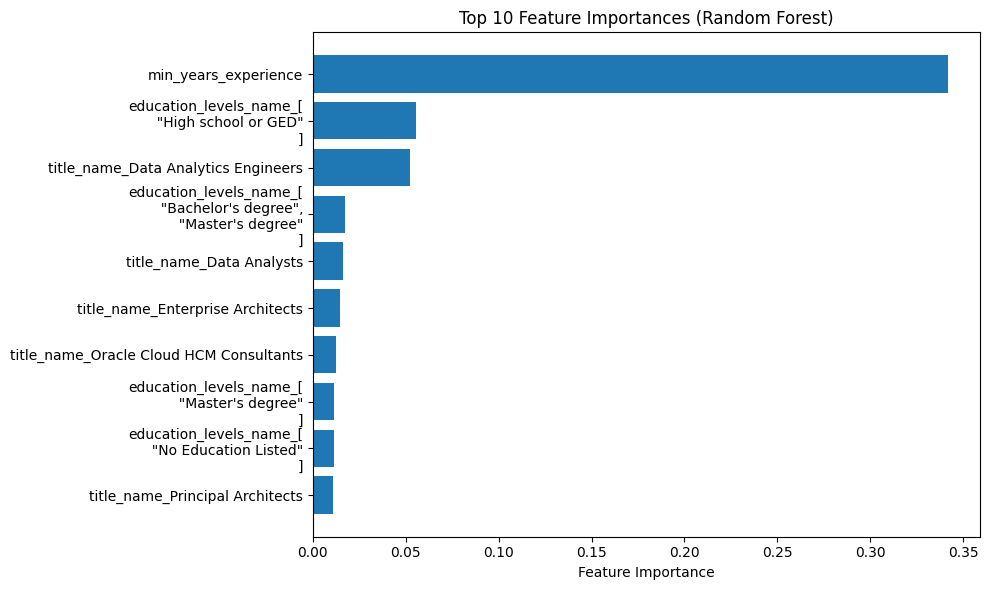

In [9]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_reg.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier sorting/plotting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][:10], feat_imp_df["Importance"][:10])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Insights_Top 10 Feature Importances (Random Forest):


This plot displays the top predictors of salary as determined by the Random Forest Regressor. The most important feature is clearly min_years_experience, contributing by far the most to the model’s decision-making. Other important features include: education_levels_name_High school or GED, title_name_Data Analytics Engineers

Employers place strong emphasis on practical experience, sometimes even more than academic credentials. However, education level still plays a meaningful role, especially when combined with technical job titles like "Data Analysts" or "Data Analytics Engineers". This plot helped us realize that work experience is the top factor to focus on for job readiness, while title and education serve as amplifiers.

## Residual Analysis (for Regression)

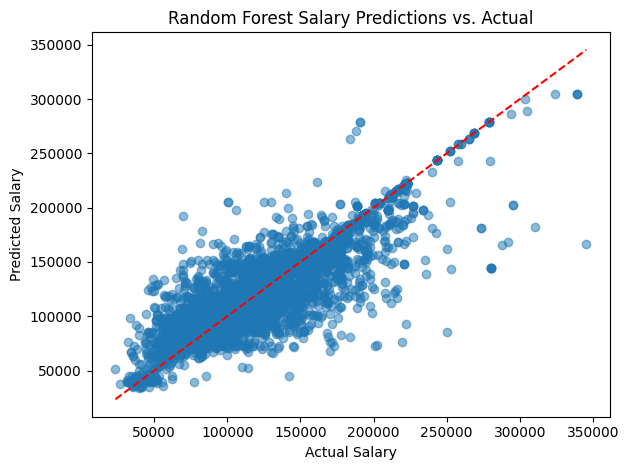

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest Salary Predictions vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


## Insights_Random Forest Predictions vs. Actual Salaries:

This scatter plot compares predicted salaries to actual salaries in the test set. Most of the points cluster near the red dashed ideal prediction line (y = x), meaning the model is performing well. However: At very high salary levels, the predictions begin to underestimate. There is noticeable spread for mid-range salaries, showing some noise.

This plot helped us understand that while Random Forest is strong overall, it may struggle slightly with outliers — especially high-paying jobs, which might be rarer or more influenced by unmeasured variables (like industry-specific bonuses).




## Salary by State

/tmp/ipykernel_2980/4203984991.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_by_state, x="salary", y="state_name", palette="Blues_d")


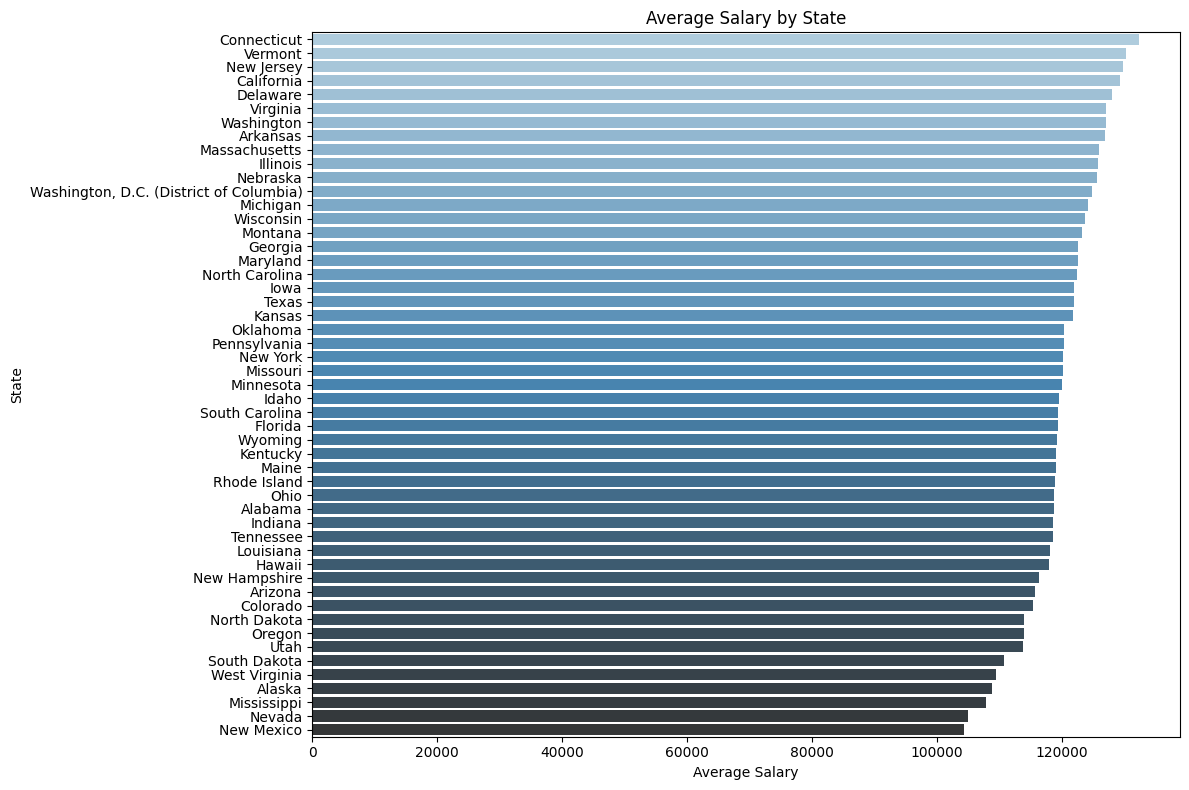

In [11]:
import pandas as pd
import seaborn as sns

# Group by state and calculate mean salary
salary_by_state = df_clean.groupby("state_name")["salary"].mean().sort_values(ascending=False).reset_index()

# Set up the figure
plt.figure(figsize=(12, 8))
sns.barplot(data=salary_by_state, x="salary", y="state_name", palette="Blues_d")

# Add labels and title
plt.xlabel("Average Salary")
plt.ylabel("State")
plt.title("Average Salary by State")
plt.tight_layout()
plt.show()


## Insights_Average Salary by State

This horizontal bar chart ranks U.S. states by average salary from job postings. Top-paying states include: Connecticut, Vermont, New Jersey, and California .Low-paying states include: Mississippi, Nevada, New Mexico

Exploring regional job prospects, this visualization was eye-opening. While we initially expected states like California and New York to lead (and they do rank high), we was surprised to see Connecticut and Vermont at the top — possibly due to fewer postings but higher-paying specialized roles. This plot shows that job seekers can optimize job search by region, especially when relocating is an option. It also raises a good follow-up question: Are these high-salary states also high cost-of-living?



## Remote vs On-site by State or Industry

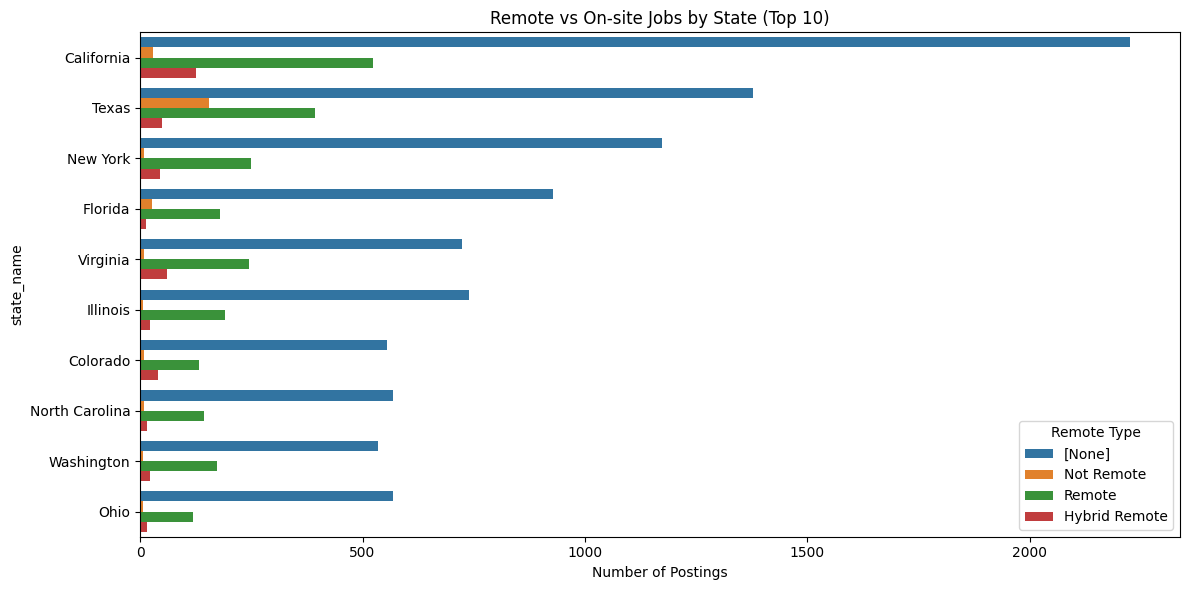

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of remote types by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, y="state_name", hue="remote_type_name", order=df_clean["state_name"].value_counts().index[:10])
plt.title("Remote vs On-site Jobs by State (Top 10)")
plt.xlabel("Number of Postings")
plt.legend(title="Remote Type")
plt.tight_layout()
plt.show()


## Insights_Remote vs. On-site Jobs by State (Top 10):

This grouped bar chart breaks down job postings by remote type across the top 10 states with the most postings. Key takeaways: California, Texas, and New York dominate total postings. Remote and hybrid opportunities are more prevalent in tech-heavy states like California, Washington, and Colorado. States like Florida and Texas also show strong representation across all types.

This was particularly useful in tying back to our project topic: Geographic and Remote Work Analysis. we learned that remote work options are not evenly distributed, they follow industry and infrastructure trends. As someone interested in data roles, states with high remote/hybrid ratios (like CA or WA) would offer the most flexibility. It also supports the idea that remote roles often come from urban or tech-forward regions, which we can tie to education and skill clusters found in those same places.

# Job Seeker Recommendation

From our regression analysis and feature importance visualizations (e.g., Top 10 Feature Importances (Random Forest) and Predicted vs Actual Salary Scatterplot), it’s clear that min_years_experience is the most influential factor in predicting salary. Job seekers should actively build experience in their desired field, as it has a stronger salary impact than education alone.

Furthermore, the choropleth map of average salary by state (Average Salary by U.S. State) highlights regions like California, New York, and Washington D.C. as offering the highest average pay. Candidates looking to maximize salary should explore remote or in-person roles based in these states, and leverage tools like location filters when searching for jobs online.